# Deep Learning and PyTorch
## 11/28/2023

<a href="?print-pdf">print view</a>

<a href="deeplearning.ipynb">notebook</a>

In [1]:
%%html
<script src="https://bits.csb.pitt.edu/preamble.js"></script>

# OMET Teaching Survey

Please fill out.

# Perceptron

<center><img src="../files/perceptron.png" width="400"></center>

$$output = \begin{cases} 0 \text{ if } w\cdot x + b \le 0 \\ 1 \text{ if } w\cdot x + b > 0 \end{cases}$$

# Perceptron

Consider the following perceptron:

<center><img src="imgs/tikz2.png"></center>

If $x$ takes on only binary values, what are the possible outputs?

In [2]:
%%html
<div id="inand" style="width: 500px"></div>
<script>

    var divid = '#inand';
	jQuery(divid).asker({
	    id: divid,
	    question: "What are the corresponding outputs for x = [0,0],[0,1],[1,0], and [1,1]?",
		answers: ["0,0,0,0","0,1,1,0","0,0,0,1","0,1,1,1","1,1,1,0"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Neurons

<img src="imgs/tikz9.png">

Instead of a *binary* output, we set the output to the result of an **activation function** $\sigma$

$$output = \sigma(w\cdot x + b)$$

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.linspace(-10,10,500)

# Activation Functions: Step (Perceptron)

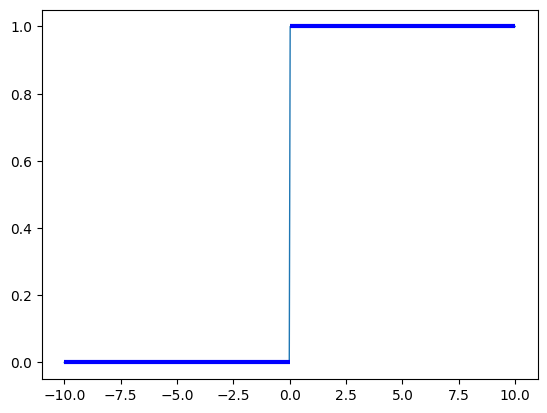

In [4]:
plt.plot(x, x > 0,linewidth=1,clip_on=False);
plt.hlines(xmin=-10,xmax=0,y=0,linewidth=3,color='b')
plt.hlines(xmin=0,xmax=10,y=1,linewidth=3,color='b');

# Activation Functions: Sigmoid (Logistic)

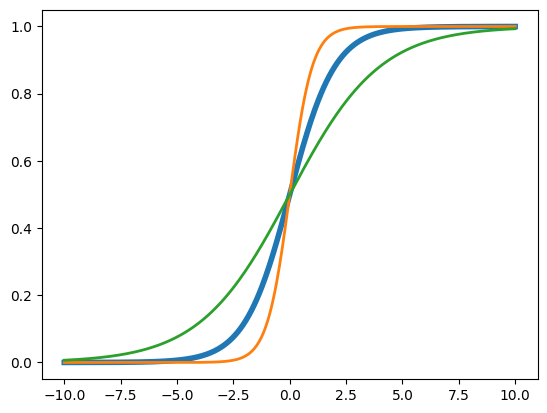

In [5]:
plt.plot(x, 1/(1+np.exp(-x)),linewidth=4,clip_on=False);
plt.plot(x, 1/(1+np.exp(-2*x)),linewidth=2,clip_on=False);
plt.plot(x, 1/(1+np.exp(-.5*x)),linewidth=2,clip_on=False);

# Activation Functions: tanh

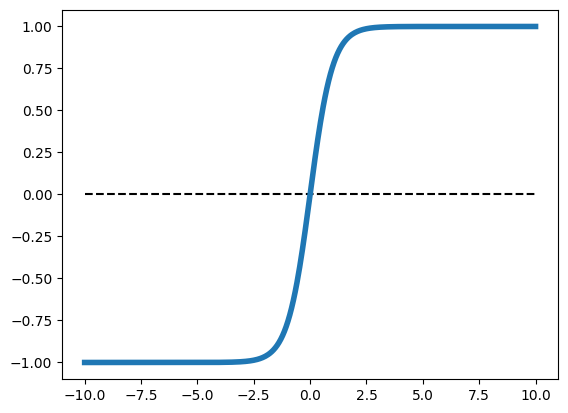

In [6]:
plt.plot([-10,10],[0,0],'k--')
plt.plot(x, np.tanh(x),linewidth=4,clip_on=False);

# Activation Functions: ReLU
Rectified Linear Unit: $\sigma(z) = \max(0,z)$

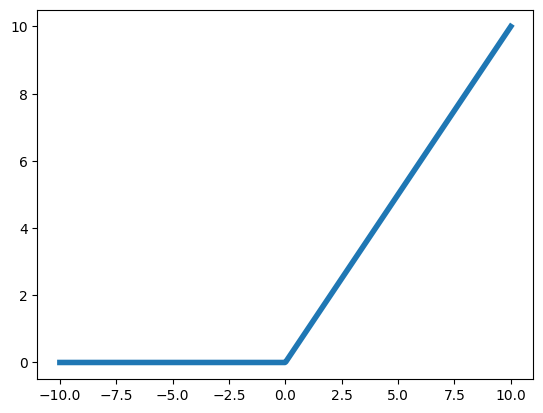

In [7]:
plt.plot(x,x*(x > 0),clip_on=False,linewidth=4);

# Networks

<img src="imgs/tikz11.png">

Terminology alert: networks of neurons are sometimes called *multilayer perceptrons*, despite not using the step function.

In [8]:
%%html
<div id="ibpcnt" style="width: 500px"></div>
<script>

    var divid = '#ibpcnt';
	jQuery(divid).asker({
	    id: divid,
	    question: "A network has 10 input nodes, two hidden layers each with 10 neurons, and 10 output neurons.  How many parameters does training have to estimate?",
		answers: ["30","100","300","330","600"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

# Networks

<img src="imgs/tikz12.png" style="float:right"> The number of input neurons corresponds to the number of features.

The number of output neurons corresponds to the number of label classes.  For binary classification, it is common to have two output nodes.

Layers are typically *fully connected*.

# Neural Networks

The <a href="https://en.wikipedia.org/wiki/Universal_approximation_theorem">universal approximation theorem</a> says that, if some reasonable assumptions are made, a feedforward neural network with a finite number of nodes can approximate any continuous function to within a given error $\epsilon$ over a bounded input domain.

The theorem says nothing about the design (number of nodes/layers) of such a network.

The theorem says nothing about the *learnability* of the weights of such a network.

These are open theoretical questions.

Given a network design, how are we going to learn weights for the neurons?

# Stochastic Gradient Descent
<img src="imgs/valley_with_ball.png" width="300" style="float:right">

Randomly select $m$ training examples $X_j$ and compute the gradient of the loss function ($L$).  Update weights and biases with a given _learning rate_  $\eta$.
$$ w_k' = w_k-\frac{\eta}{m}\sum_j^m 
\frac{\partial L_{X_j}}{\partial w_k}$$
$$b_l' = b_l-\frac{\eta}{m}
  \sum_j^m \frac{\partial L_{X_j}}{\partial b_l}
$$

Common loss functions: logistic, hinge, cross entropy, euclidean

# Loss Functions

<center><img src="../files/lossfuncs.png"></center>

x = 1 is a correct prediction, x = -1 a wrong prediction

## Backpropagation
<font size="3">

Backpropagation is an efficient algorithm for computing the partial derivatives needed by the gradient descent update rule.  For a training example $x$ and loss function $L$ in a network with $N$ layers:

1. **Feedforward**.  For each layer $l$ compute
 $$a^{l} = \sigma(z^{l})$$
 where $z$ is the weighted input and $a$ is the activation induced by $x$ (these are vectors representing all nodes of layer $l$).
 
2. **Compute output error**
$$\delta^{N} = \nabla_a L \odot \sigma'(z^N)$$
where $ \nabla_a L_j = \partial L / \partial a^N_j$, the gradient of the loss with respect to the output activations. $\odot$ is the elementwise product.

3. **Backpropagate the error**
$$\delta^{l} = ((w^{l+1})^T \delta^{l+1}) \odot
  \sigma'(z^{l})$$
  
4. **Calculate gradients**
$$\frac{\partial L}{\partial w^l_{jk}} = a^{l-1}_k \delta^l_j \text{ and } \frac{\partial L}{\partial b^l_j} = \delta^l_j$$
    </font>

## Backpropagation as the Chain Rule

&nbsp;

$$\frac{\partial L}{\partial a^l} \cdot \frac{\partial a^l}{\partial z^l} \cdot \frac{\partial z^l}{\partial a^{l-1}} \cdot \frac{\partial a^{l-1}}{\partial z^{l-1}} \cdot \frac{\partial z^{l-1}}{\partial a^{l-2}} \cdots \frac{\partial a^{1}}{\partial z^{l}} \cdot \frac{\partial z^{l}}{\partial x}  $$

# Deep Learning

<center><img src="imgs/tikz36.png"></center>

A deep network is not more powerful (recall can approximate any function with a single layer), but may be more concise - can approximate some functions with many fewer nodes.

# Convolutional Neural Nets

<center><img src="https://devblogs.nvidia.com/parallelforall/wp-content/uploads/2015/08/image1-624x293.png"></center>

Image recognition challenge results. Purple are deep learning methods.

# Convolution Filters

A filter applies a *convolution kernel* to an image.  

The kernel is represented by an $n$x$n$ matrix where the target pixel is in the center.  

The output of the filter is the sum of the products of the matrix elements with the corresponding pixels.

Examples from [Wikipedia](https://en.wikipedia.org/wiki/Kernel_(image_processing)):

<table style="border: 0px solid black; text-align=center">
<tr><td><img src="https://upload.wikimedia.org/math/7/a/d/7ad9f1c26f76bc1ee55fdf0ef8c6197a.png"></td>
<td>
<img src="https://upload.wikimedia.org/math/3/0/c/30c42f667a353a5f0fbe92b0c4f2eee1.png">
</td>
<td>
<img src="https://upload.wikimedia.org/math/7/d/d/7ddb57480ef9fa57e2d1c2b3ffecb291.png">
</td>
</tr>
<tr><td>Identity</td><td>Blur</td><td>Edge Detection</td>
</table>

# Feature Maps

We can think of a kernel as identifying a *feature* in an image and the resulting image as a feature map that has high values (white) where the feature is present and low values (black) elsewhere.

*Feature maps retain the **spatial relationship** between features present in the original image.*


# Convolutional Layers

<img src="../files/conv.png" width="400" style="float:right"> A single kernel is applied across the input.  For each output feature map there is a single set of weights.

# Convolutional Layers

For images, each pixel is an input feature.  Each hidden layer is a set of feature maps.

<center><img src="imgs/tikz44.png"></center>

# Pooling

Pooling layers apply a fixed convolution (usually the non-linear MAX kernel).  The kernel is usually applied with a *stride* to reduce the size of the layer.
 * faster to train
 * fewer parameters to fit
 * less sensitive to small changes (MAX)
<center><img src="imgs/tikz47.png"></center>

Consider an input image with 100 pixels.  In a classic neural network, we hook these pixels up to a hidden layer with 10 nodes.  In a CNN, we hook these pixels up to a convolutional layer with a 3x3 kernel and 10 output feature maps.

In [9]:
%%html
<div id="iweightcnt" style="width: 500px"></div>
<script>

    var divid = '#iweightcnt';
	jQuery(divid).asker({
	    id: divid,
	    question: "Which network has more parameters to learn?",
		answers: ["Classic","CNN"],
        server: "https://bits.csb.pitt.edu/asker.js/example/asker.cgi",
		charter: chartmaker})
    
$(".jp-InputArea .o:contains(html)").closest('.jp-InputArea').hide();


</script>

<center><img src="../files/cnnex.png"></center>
The last features maps are typically connected to one or more fully-connected layers to produce the desired output.

# <a href="https://pytorch.org/">PyTorch</a>

PyTorch creates the dataflow graph implicitly as operations are performed.

* Dataflow graph can be parallelized
* Dataflow graph maintains **autograd** information - how to compute gradients for backpropagation
* Extremely flexible
* Easier to debug and develop than static approach

# PyTorch Tensors

Tensor is very similar to `numpy.array` in functionality.
 * Is allocated to a device (CPU vs GPU)
 * Potentially maintains autograd information

In [10]:
import torch  # note package is not called pytorch

T = torch.rand(3,4)
T

tensor([[0.6449, 0.8679, 0.7000, 0.7213],
        [0.7735, 0.5921, 0.2053, 0.5418],
        [0.5145, 0.2320, 0.5560, 0.0838]])

In [11]:
T.shape,T.dtype,T.device,T.requires_grad

(torch.Size([3, 4]), torch.float32, device(type='cpu'), False)

# Modules vs Functional

**Modules** are objects that can be initialized with default parameters and store any learnable parameters.  Learnable parameters can be easily extracted from the module (and any member modules).  Modules are called as functions on their inputs.

**Functional** APIs maintain no state.  All parameters are passed when the function is called.

In [12]:
import torch.nn as nn
import torch.nn.functional as F

# A network is a module

To define a network we create a module with submodules for operations with learnable parameters.  Generally use functional API for operations without learnable parameters.

In [13]:
class MyNet(nn.Module):
    def __init__(self):  #initialize submodules here - this defines our network architecture
        super(MyNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1) 
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(2304, 10) #mystery X

    def forward(self, x): # this actually applies the operations
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)  # POOL    
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2) # POOL
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        return x

# MNIST

In [17]:
from torchvision import datasets
train_data = datasets.MNIST(root='../data', train=True,download=True)
test_data = datasets.MNIST(root='../data', train=False)

In [18]:
train_data[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F25E2ED6FB0>, 5)

In [19]:
train_data[0][0]

Inputs need to be tensors...

In [20]:
from torchvision import transforms
train_data = datasets.MNIST(root='../data', train=True,transform=transforms.ToTensor())
test_data = datasets.MNIST(root='../data', train=False,transform=transforms.ToTensor())

In [21]:
train_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

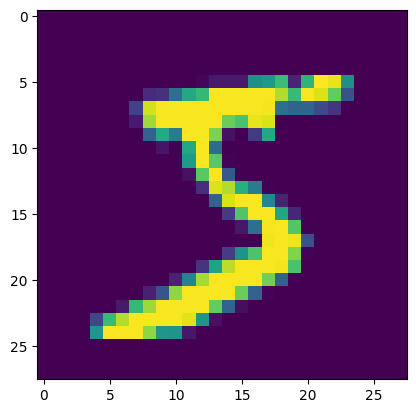

In [22]:
plt.imshow(train_data[0][0][0])

# Training MNIST

In [23]:
#process 10 randomly sampled images at a time
train_loader = torch.utils.data.DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=10,shuffle=False)

#instantiate our neural network and put it on the GPU
model = MyNet().to('cuda')

In [24]:
batch = next(iter(train_loader))
batch

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [25]:
output = model(batch[0].to('cuda')) # model is on GPU, so must put input there too
output

tensor([[-0.0618,  0.0725,  0.0696,  0.0907,  0.0204, -0.1858,  0.0752,  0.0432,
         -0.1025, -0.0215],
        [-0.0696,  0.0885, -0.0112,  0.1133,  0.0270, -0.1915,  0.1485, -0.0218,
         -0.1089,  0.0137],
        [-0.0315,  0.0997,  0.0130,  0.0563,  0.0575, -0.1342,  0.1309,  0.0970,
         -0.0519,  0.0064],
        [-0.0242,  0.0943,  0.0179,  0.0685,  0.0844, -0.2072,  0.0581,  0.1100,
         -0.1413,  0.0031],
        [-0.0648,  0.0661,  0.0950,  0.0312,  0.0466, -0.1491,  0.0859,  0.0665,
         -0.0603,  0.0305],
        [-0.0315,  0.0449,  0.0610,  0.1021,  0.0320, -0.1344,  0.1114,  0.0320,
         -0.0648,  0.0369],
        [-0.0270,  0.0672,  0.0473,  0.0491,  0.0293, -0.1694,  0.0731,  0.0291,
         -0.1106,  0.0358],
        [-0.0456,  0.0428,  0.0516,  0.0689,  0.0399, -0.2126,  0.0604,  0.0615,
         -0.0844, -0.0294],
        [-0.0477,  0.0740,  0.0625,  0.0808,  0.0134, -0.1671,  0.1014,  0.0406,
         -0.1062,  0.0309],
        [-0.0168,  

# Training MNIST

Our network takes an image (as a tensor) and outputs class probabilities.
 * Need a loss
 * Need an optimizer (e.g. SGD, ADAM)
   * `backward` does _not_ update parameters

In [26]:
loss = F.cross_entropy(output,batch[1].to('cuda')) #combines log softmax and 
loss

tensor(2.3067, device='cuda:0', grad_fn=<NllLossBackward0>)

$$L(x,class) = - \log\left(\frac{e^{x_{\mathrm{class}}}}{\sum_j e^{x_j}}\right)$$

In [27]:
loss.backward() # sets grad, but does not change parameters of model

# Training MNIST

**Epoch** - One pass through the training data.

In [28]:
%%time
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001) # need to tell optimizer what it is optimizing

losses = []
for epoch in range(10):
    for i, (img,label) in enumerate(train_loader):
        optimizer.zero_grad()  # IMPORTANT!
        img, label = img.to('cuda'), label.to('cuda')
        output = model(img)
        loss = F.cross_entropy(output, label)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

CPU times: user 3min 44s, sys: 1.69 s, total: 3min 46s
Wall time: 3min 50s


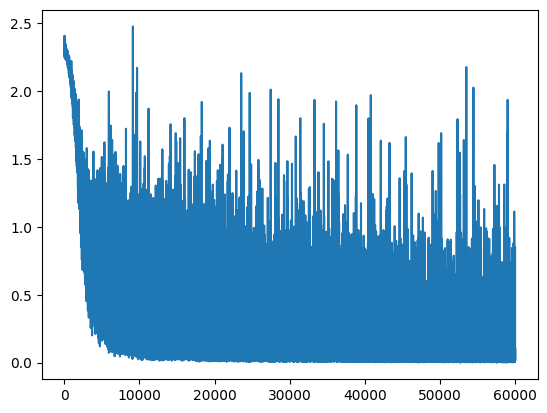

In [29]:
plt.plot(losses)

This is the **batch loss**.

# Testing MNIST

In [30]:
correct = 0
with torch.no_grad(): #no need for gradients - won't be calling backward to clear them
    for img, label in test_loader:
        img, label = img.to('cuda'), label.to('cuda')
        output = F.softmax(model(img),dim=1)
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(label.view_as(pred)).sum().item()
        
print("Accuracy",correct/len(test_loader.dataset))

Accuracy 0.9684


# Some Failures

*Not from this particular network

<center><img src="imgs/ensemble_errors.png"></center>
Top label is correct.  Bottom is prediction from a CNN.

# Generative vs. Discriminative

A *generative* model produces as output the input of a discriminative model: $P(X|Y=y)$ *or* $P(X,Y)$

<p>
<div style="font-size: 150%">$y \rightarrow$<div style="display: inline-block; background-color: black; width: 5em; color: white; font-size: 120%; padding: 1em; font-weight: bold">Model</div>
$ \rightarrow X$</div>

<p>
<div style="font-size: 150%"><div style="display: inline-block; background-color: black; width: 5em; color: white; font-size: 120%; padding: 1em; font-weight: bold">Model</div>
$ \rightarrow X,y$</div>

# Autoencoders

A neural network trained to generate its input.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/28/Autoencoder_structure.png" width="600">

https://en.wikipedia.org/wiki/Autoencoder

# Latent Space

http://blog.fastforwardlabs.com/2016/08/12/introducing-variational-autoencoders-in-prose-and.html

<img src="http://fastforwardlabs.github.io/blog-images/miriam/tableau.1493x693.png" width="800">

# Latent Space Arithmetic

https://arxiv.org/pdf/1707.05776.pdf

<img src="../files/latentadd.png" width="600">

# Latent Spaces for Molecules

https://arxiv.org/abs/1610.02415

<table style="border:none">
<tr style="border:none">
<td style="border:none">
<img src="../files/latentchem1.png" width="300">
1% - 70% of output valid SMILES 
</td>
<td style="border:none">
<img src="../files/latentchem2.png" width="450">
<img src="../files/latentchem3.png" width="450">
</td>
</tr>
</table>

# Generative Models of the Cell

https://arxiv.org/pdf/1705.00092.pdf

<table style="border:none">
<tr style="border:none">
<td style="border:none">
<img src="../files/cellgen1.png" width="400">
</td>
<td style="border:none">
<img src="../files/cellgen2.png" width="400">
</td>
</tr>
</table>

https://drive.google.com/file/d/0B2tsfjLgpFVhMnhwUVVuQnJxZTg/view

# Generative Adversarial Networks

https://arxiv.org/abs/1406.2661
<img src="https://i.stack.imgur.com/UnKny.png" width="600">
https://youtu.be/G06dEcZ-QTg


https://thispersondoesnotexist.com

<img src="https://thispersondoesnotexist.com" width="400">

# pix2pix

<img src="https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/imgs/edges2cats.jpg?raw=true">

https://affinelayer.com/pixsrv/

https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

# CycleGAN

https://medium.com/coding-blocks/introduction-to-cyclegans-1dbdb8fbe781

<img src="https://miro.medium.com/max/896/1*dWd0lVTbnu80UZM641gCbw.gif">

<center>
<img src="https://miro.medium.com/max/520/1*1Qaj9C79S3dGeBpbWLXMEg.png" style="display:inline-block"><img src="https://miro.medium.com/max/1258/1*XhdrXh3UfCM4CecRrTwMCQ.png" width="400" style="display:inline-block">
</center>

https://techcrunch.com/2018/12/31/this-clever-ai-hid-data-from-its-creators-to-cheat-at-its-appointed-task/

<img src="https://techcrunch.com/wp-content/uploads/2018/12/mapdetails.jpg">

## Deep learning is not profound learning.

But it is quite powerful and flexible.